<a href="https://colab.research.google.com/github/OscarTMa/04-Computer_Vision/blob/main/Dogs_vs_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Chemins des répertoires contenant les images de chat et de chien
train_dir = '/content/drive/My Drive/DataSets/dogs-vs-cats/train'
test_dir = '/content/drive/My Drive/DataSets/dogs-vs-cats/test1'

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [ ]:
# Importation des bibliothèques nécessaires

import pandas as pd


# Lister les fichiers dans le répertoire
noms_fichiers = os.listdir(train_dir)

In [ ]:
# Initialiser une liste pour les catégories
categories = []

# Boucle pour assigner les catégories
for filename in noms_fichiers:
    # Obtenir la partie avant le premier point du nom de fichier
    categorie = filename.split('.')[0]
    # Vérifier si cette partie est "dog"
    if categorie == 'dog':
        # Ajouter 1 à la liste categories (indiquant que c'est une image de chien)
        categories.append(1)
    else:
        # Ajouter 0 à la liste categories (indiquant que c'est une image de chat)
        categories.append(0)

In [ ]:
# Créer un DataFrame avec pandas
df = pd.DataFrame({
    'filename': noms_fichiers,
    'category': categories
})

# Afficher le DataFrame
print(df.head())

        filename  category
0   cat.2040.jpg         0
1  cat.10504.jpg         0
2   cat.1276.jpg         0
3    cat.496.jpg         0
4  dog.12300.jpg         1


In [ ]:
# Créer un graphique en nombre des catégories
compte_categories = df['category'].value_counts()
noms_categories = ['Chien', 'Chat']
compte_categories

category
0    2049
1    2025
Name: count, dtype: int64

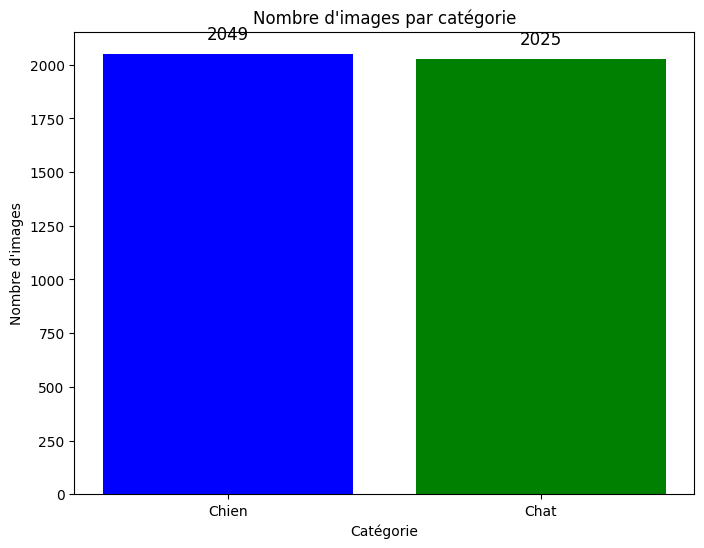

In [ ]:
plt.figure(figsize=(8, 6))
couleurs = ['blue', 'green']  # Couleurs compréhensibles
plt.bar(noms_categories, compte_categories, color=couleurs)
plt.xlabel('Catégorie')
plt.ylabel('Nombre d\'images')
plt.title('Nombre d\'images par catégorie')
for i, v in enumerate(compte_categories):
    plt.text(i, v + 50, str(v), ha='center', va='bottom', fontsize=12, color='black')


In [ ]:
from tensorflow.keras.preprocessing import image
import random
# Sélectionner une image aléatoire
# Sélectionner une image aléatoire
image_aleatoire = random.choice(noms_fichiers)


# Chemin complet de l'image sélectionnée
img_path = os.path.join(train_dir, image_aleatoire)
img_path

'/content/drive/My Drive/DataSets/dogs-vs-cats/train/cat.6919.jpg'

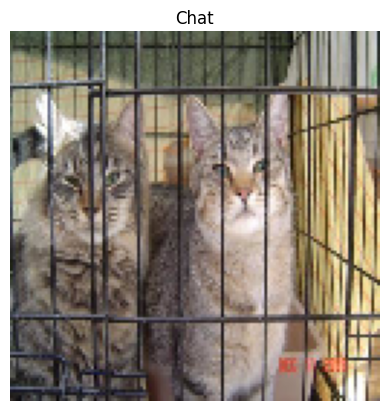

In [ ]:
# Charger et afficher l'image
img = image.load_img(img_path, target_size=(128, 128))
plt.imshow(img)
categorie = 'Chien' if 'dog' in image_aleatoire else 'Chat'
plt.title(categorie)
plt.axis('off')
plt.show()

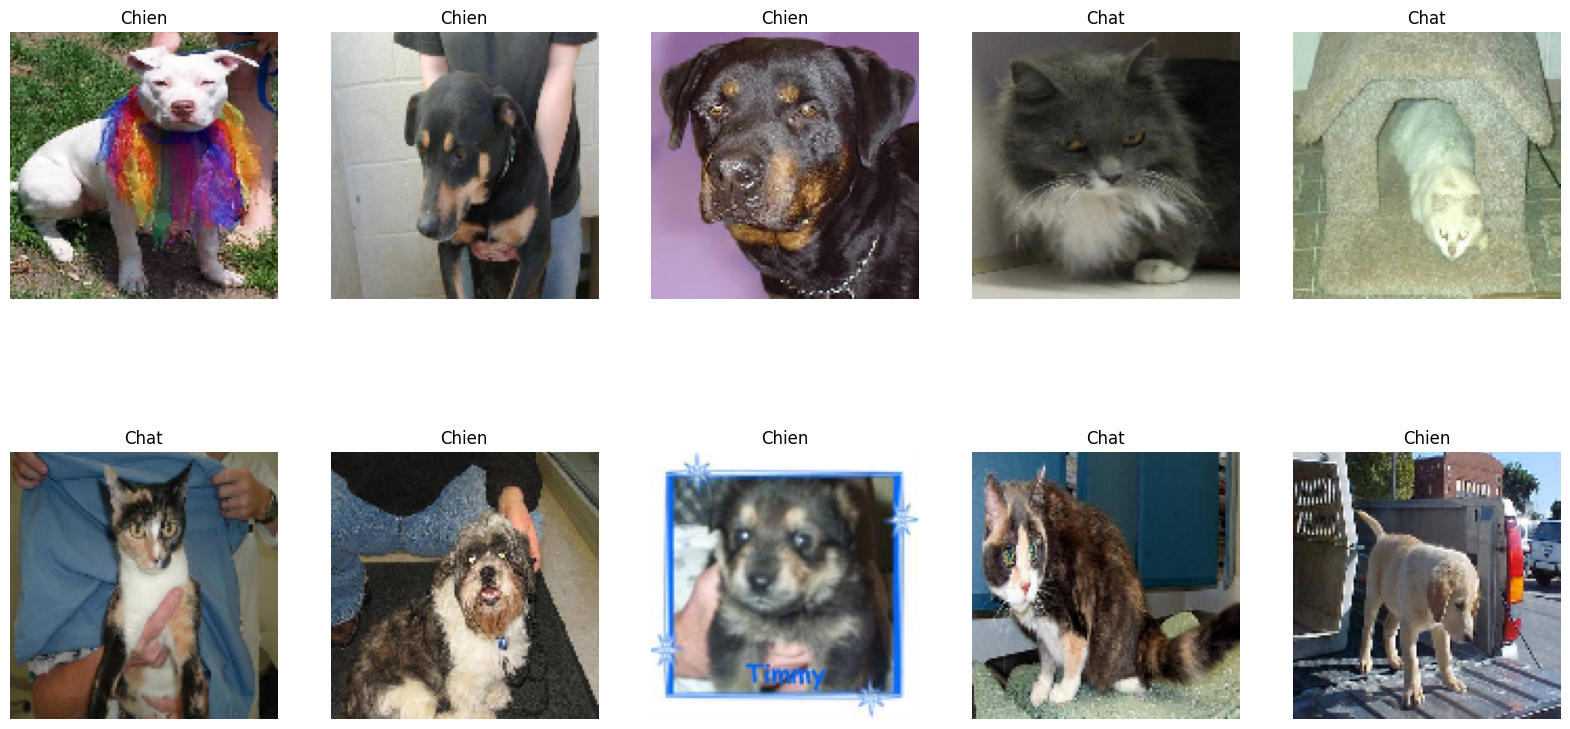

In [ ]:
from tensorflow.keras.preprocessing import image
# Sélectionner 10 images aléatoires
random_images = df.sample(n=10)

# Afficher les 10 images aléatoires
plt.figure(figsize=(20, 10))

for i, row in enumerate(random_images.iterrows()):
    filename = row[1]['filename']
    category = 'Chien' if row[1]['category'] == 1 else 'Chat'
    img_path = os.path.join(train_dir, filename)
    img = image.load_img(img_path, target_size=(128, 128))
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.title(category)
    plt.axis('off')

plt.show()

# Prétraitement des données pour la génération d'images

## 1. Lire les fichiers d'image
La première étape consiste à lire les fichiers d'image à partir de votre stockage. Cela permet de charger les images brutes dans votre programme pour les étapes suivantes de prétraitement.

## 2. Décoder le contenu JPEG en grilles de pixels RGB
Une fois que les images sont lues, nous devons les décoder à partir de leur format JPEG compressé en grilles de pixels RGB (Rouge, Vert, Bleu). Cela transforme l'image en une matrice de valeurs numériques représentant les couleurs.

## 3. Convertir ces grilles en tableaux de nombres à virgule flottante
Les réseaux de neurones travaillent mieux avec des nombres. Nous devons donc convertir les grilles de pixels en tableaux de nombres à virgule flottante pour pouvoir les utiliser dans nos modèles de deep learning.

## 4. Rescaler les valeurs des pixels entre 0 et 255 à l'intervalle 0,1
Les réseaux de neurones préfèrent traiter des valeurs d'entrée petites et normalisées. Nous devons donc rescaler les valeurs des pixels de leur intervalle original [0, 255] à l'intervalle [0, 1].

Cette étape de normalisation permet d'améliorer la performance et la stabilité du modèle d'apprentissage, en garantissant que les valeurs d'entrée sont petites et homogènes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Ré-échelle les valeurs des pixels entre 0 et 255 à l'intervalle 0,1
    validation_split=0.2  # 20% des données pour la validation
)

In [ ]:
df

filename  category
0      cat.2040.jpg         0
1     cat.10504.jpg         0
2      cat.1276.jpg         0
3       cat.496.jpg         0
4     dog.12300.jpg         1
...             ...       ...
4069  dog.10149.jpg         1
4070   dog.3837.jpg         1
4071  cat.11140.jpg         0
4072   dog.8334.jpg         1
4073  cat.10529.jpg         0

[4074 rows x 2 columns]

In [ ]:
# Sélectionner aléatoirement 1500 images de chats (catégorie 0)
chats_df = df[df['category'] == 0].sample(n=1500, random_state=42)

# Sélectionner aléatoirement 1500 images de chiens (catégorie 1)
chiens_df = df[df['category'] == 1].sample(n=1500, random_state=42)

# Combiner les deux DataFrames
df_final = pd.concat([chats_df, chiens_df]).reset_index(drop=True)


In [ ]:
 #S'assurer que la colonne 'category' contient des chaînes de caractères
df_final['category'] = df_final['category'].astype(str)

# Générateur pour les données d'entraînement
train_generator = train_datagen.flow_from_dataframe(
    df_final,
    "/content/drive/My Drive/DataSets/dogs-vs-cats/train",
    x_col='filename',
    y_col='category',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'  # Utiliser les données d'entrainnement
)

Found 2400 validated image filenames belonging to 2 classes.


In [ ]:

# Générateur pour les données de validation
validation_generator = train_datagen.flow_from_dataframe(
    df_final,
    "/content/drive/My Drive/DataSets/dogs-vs-cats/train",
    x_col='filename',
    y_col='category',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Utiliser les données de validation
)

Found 600 validated image filenames belonging to 2 classes.


Taille du lot de données : (32, 150, 150, 3)
Taille du lot d'étiquettes : (32,)


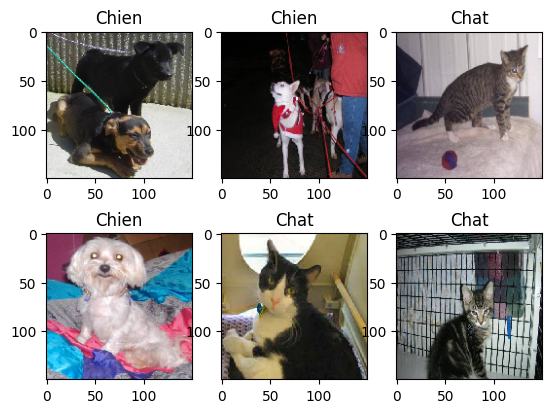

In [ ]:
 #Affichage de quelques images pour vérifier le prétraitement
for data_batch, labels_batch in train_generator:
    print("Taille du lot de données :", data_batch.shape)  # Affiche la forme du lot de données
    print("Taille du lot d'étiquettes :", labels_batch.shape)  # Affiche la forme du lot d'étiquettes
    for i in range(6):
        plt.subplot(2, 3, i + 1)
        plt.imshow(data_batch[i])  # Affiche l'image prétraitée
        plt.title("Chat" if labels_batch[i] == 0 else "Chien")  # Titre en fonction de l'étiquette
    plt.show()
    break  # Affiche un seul lot d'images

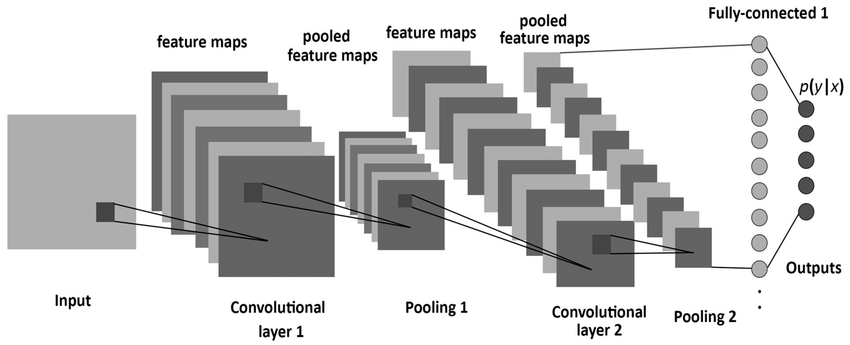

In [ ]:
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models

model = models.Sequential()

from tensorflow.keras import layers, models

model = models.Sequential()

# Ajouter les couches une par une

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))  # Couche de convolution : 32 filtres de 3x3, détecte des motifs simples dans l'image, ReLU pour rendre le modèle non-linéaire, forme d'entrée (150x150x3).

model.add(layers.MaxPooling2D((2, 2)))  # Couche de max pooling : réduit les dimensions de l'image en prenant le maximum de chaque carré de 2x2 pixels.

model.add(layers.Conv2D(64, (3, 3), activation='relu'))  # Deuxième couche de convolution : 64 filtres de 3x3, détecte des motifs plus complexes, ReLU pour l'activation.

model.add(layers.MaxPooling2D((2, 2)))  # Deuxième couche de max pooling : réduit encore les dimensions de l'image.

model.add(layers.Conv2D(128, (3, 3), activation='relu'))  # Troisième couche de convolution : 128 filtres de 3x3, détecte des motifs encore plus complexes, ReLU pour l'activation.

model.add(layers.MaxPooling2D((2, 2)))  # Troisième couche de max pooling : réduit encore les dimensions de l'image.

model.add(layers.Flatten())  # Couche Flatten : transforme les données 2D en un vecteur 1D pour la couche dense suivante.

model.add(layers.Dense(512, activation='relu'))  # Couche dense (fully connected) : 512 neurones, chaque neurone est connecté à tous les neurones de la couche précédente, ReLU pour l'activation.

model.add(layers.Dense(1, activation='sigmoid'))  # Couche de sortie : 1 neurone, activation sigmoïde pour produire une probabilité entre 0 et 1, utilisée pour la classification binaire (chat ou chien).


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)      

In [ ]:
from keras import optimizers

optimi = optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=optimi,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Entraînement du modèle et sauvegarde de l'historique d'entraînement dans 'history'
history = model.fit(
    train_generator,  # Utilise le générateur pour les données d'entraînement

    # Le nombre d'étapes (batches) à exécuter à chaque époque.
    # Calculé comme le nombre total d'échantillons d'entraînement divisé par la taille du lot.
    steps_per_epoch=train_generator.samples // train_generator.batch_size,

    epochs=30,  # Nombre total d'époques pour l'entraînement

    validation_data=validation_generator,  # Utilise le générateur pour les données de validation

    # Le nombre d'étapes (batches) à exécuter pour chaque époque de validation.
    # Calculé comme le nombre total d'échantillons de validation divisé par la taille du lot.
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/30
75/75 [==============================] - 1424s 19s/step - loss: 0.6523 - accuracy: 0.6263 - val_loss: 1.0202 - val_accuracy: 0.0000e+00
Epoch 2/30
75/75 [==============================] - 163s 2s/step - loss: 0.6280 - accuracy: 0.6388 - val_loss: 0.8768 - val_accuracy: 0.1042
Epoch 3/30
75/75 [==============================] - 154s 2s/step - loss: 0.6026 - accuracy: 0.6625 - val_loss: 0.6990 - val_accuracy: 0.5660
Epoch 4/30
75/75 [==============================] - 163s 2s/step - loss: 0.5733 - accuracy: 0.6992 - val_loss: 0.7012 - val_accuracy: 0.5764
Epoch 5/30
75/75 [==============================] - 163s 2s/step - loss: 0.5429 - accuracy: 0.7088 - val_loss: 0.9613 - val_accuracy: 0.3021
Epoch 6/30
75/75 [==============================] - 155s 2s/step - loss: 0.5127 - accuracy: 0.7379 - val_loss: 0.8529 - val_accuracy: 0.4531
Epoch 7/30
75/75 [==============================] - 164s 2s/step - loss: 0.4890 - accuracy: 0.7575 - val_loss: 0.6143 - val_accuracy: 0.6858
Epoch 8

In [ ]:
# Évaluer les performances du modèle sur la base de validation
validation_steps = validation_generator.samples // validation_generator.batch_size
evaluation = model.evaluate(validation_generator, steps=validation_steps)

# Afficher les résultats de l'évaluation
print(f"Perte sur la validation: {evaluation[0]}")
print(f"Précision sur la validation: {evaluation[1]}")

18/18 [==============================] - 11s 589ms/step - loss: 1.3761 - accuracy: 0.5938
Perte sur la validation: 1.3760566711425781
Précision sur la validation: 0.59375


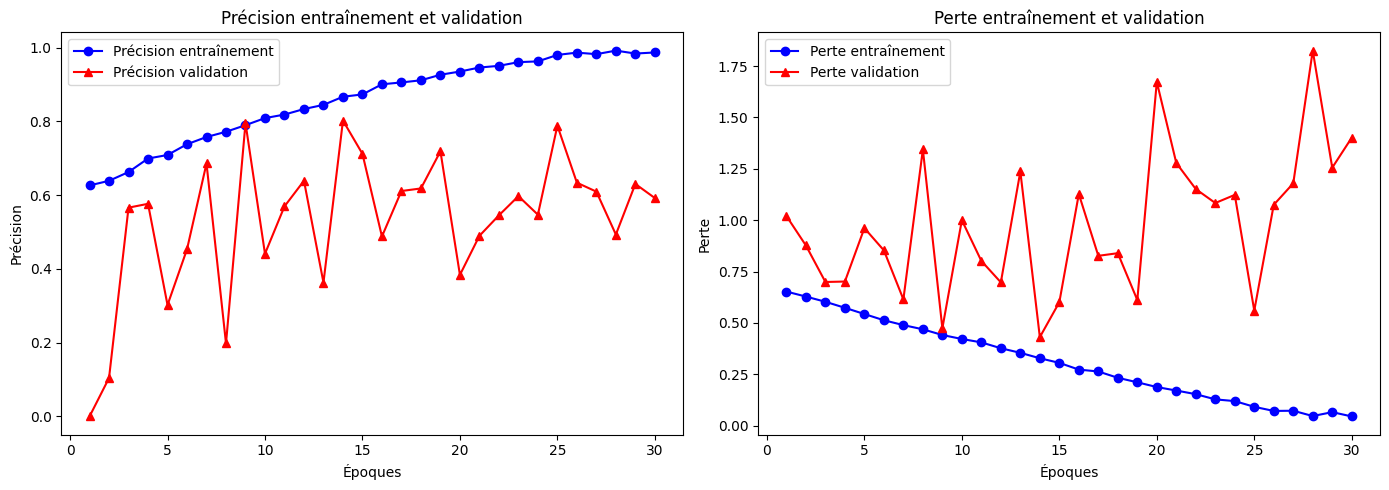

In [ ]:
# prompt: history

# Récupérer les données de l'historique
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)


# Tracer la courbe de précision
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Précision entraînement')  # 'bo-' : bleu avec des points et lignes
plt.plot(epochs, val_acc, 'r^-', label='Précision validation')  # 'r^-' : rouge avec des triangles et lignes
plt.title('Précision entraînement et validation')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()

# Tracer la courbe de perte
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Perte entraînement')  # 'bo-' : bleu avec des points et lignes
plt.plot(epochs, val_loss, 'r^-', label='Perte validation')  # 'r^-' : rouge avec des triangles et lignes
plt.title('Perte entraînement et validation')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from keras.models import load_model

# Chemin où vous voulez sauvegarder votre modèle
save_path = '/content/drive/My Drive/DataSets/dogs-vs-cats/cats_and_dogs_model.h5'

# Supposons que 'model' est votre modèle que vous avez entraîné
model.save(save_path)

print(f"Modèle sauvegardé à l'emplacement : {save_path}")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Modèle sauvegardé à l'emplacement : /content/drive/My Drive/DataSets/dogs-vs-cats/cats_and_dogs_model.h5


In [ ]:
# prompt: donne le code qui importe le modèle ici et qui réalise les prédictions et affiche 10 images avec les valeurs réelles et les valeurs prédites "/content/drive/My Drive/30DaysDeepLearning/Jour8/data/dogs-vs-cats/cats_and_dogs_model.h5"

import pandas as pd
import matplotlib.pyplot as plt
# Charger le modèle sauvegardé
model = load_model('/content/drive/My Drive/DataSets/dogs-vs-cats/cats_and_dogs_model.h5')
from keras.utils import load_img, img_to_array

# Charger le modèle sauvegardé
model = load_model('/content/drive/My Drive/DataSets/dogs-vs-cats/cats_and_dogs_model.h5')

# Sélectionner aléatoirement 10 images de chats (catégorie 0)
chats_df = df[df['category'] == 0].sample(n=10, random_state=42)

# Sélectionner aléatoirement 10 images de chiens (catégorie 1)
chiens_df = df[df['category'] == 1].sample(n=10, random_state=42)

# Combiner les deux DataFrames
df_final = pd.concat([chats_df, chiens_df]).reset_index(drop=True)

# S'assurer que la colonne 'category' contient des chaînes de caractères
df_final['category'] = df_final['category'].astype(str)


In [ ]:
# Générateur pour les données de test
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    df_final,
    directory="/content/drive/My Drive/DataSets/dogs-vs-cats/train",
    x_col='filename',
    y_col='category',
    target_size=(150, 150),
    batch_size=10,
    class_mode='binary',
    shuffle=False  # Ne pas mélanger les données de test
)

# Faire des prédictions
predictions = model.predict(test_generator)


Found 20 validated image filenames belonging to 2 classes.
2/2 [==============================] - 0s 112ms/step


In [ ]:
# Convertir les prédictions en classes (0 ou 1)
predicted_classes = (predictions > 0.5).astype(int).flatten()

# Ajouter les prédictions au DataFrame
df_final['predictions'] = predicted_classes
df_final

filename category  predictions
0    cat.5839.jpg        0            1
1    cat.7322.jpg        0            0
2    cat.8842.jpg        0            0
3    cat.6333.jpg        0            0
4    cat.3360.jpg        0            0
5    cat.2304.jpg        0            0
6    cat.2414.jpg        0            1
7    cat.9027.jpg        0            1
8    cat.8276.jpg        0            0
9    cat.8399.jpg        0            0
10   dog.5159.jpg        1            1
11   dog.1594.jpg        1            1
12   dog.2409.jpg        1            1
13   dog.5925.jpg        1            1
14   dog.6821.jpg        1            1
15  dog.12405.jpg        1            1
16   dog.1360.jpg        1            1
17   dog.9535.jpg        1            1
18   dog.8112.jpg        1            1
19   dog.8517.jpg        1            1

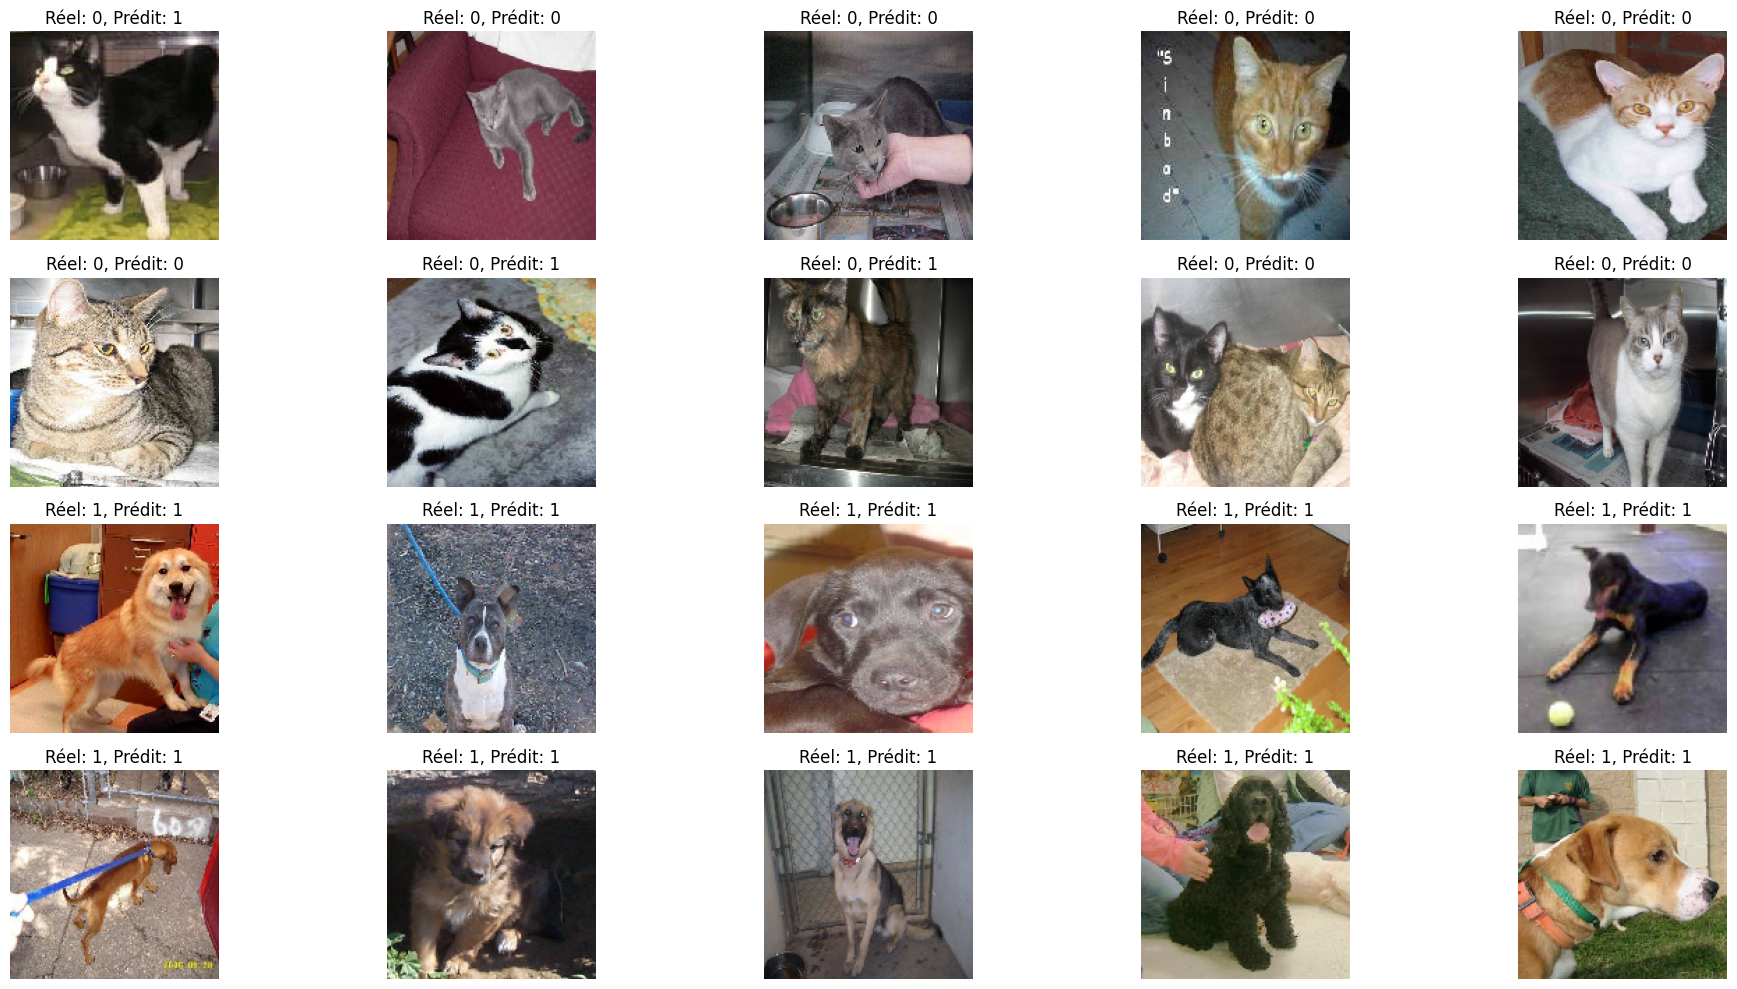

In [ ]:

# Afficher les résultats pour les 20 images (10 chats et 10 chiens)
plt.figure(figsize=(20, 10))
for i, row in df_final.iterrows():
    img_path = f"/content/drive/My Drive/DataSets/dogs-vs-cats/train/{row['filename']}"
    img = load_img(img_path, target_size=(150, 150))
    plt.subplot(4, 5, i + 1)
    plt.imshow(img)
    plt.title(f"Réel: {row['category']}, Prédit: {row['predictions']}")
    plt.axis('off')

plt.tight_layout()
plt.show()